In [20]:
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

In [21]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   


DATA_PATH = './train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])

df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4.1 s, sys: 320 ms, total: 4.42 s
Wall time: 4.43 s


In [22]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


### 한국시로 시간 설정

In [23]:
import pytz
kst = pytz.timezone('Asia/Seoul')
df['Timestamp'] = df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert(kst)

In [24]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 09:17:11+09:00,7224
1,0,A060001002,A060000001,1,2020-03-24 09:17:14+09:00,7225
2,0,A060001003,A060000001,1,2020-03-24 09:17:22+09:00,7225
3,0,A060001004,A060000001,1,2020-03-24 09:17:29+09:00,7225
4,0,A060001005,A060000001,1,2020-03-24 09:17:36+09:00,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 15:50:21+09:00,438
2266582,7441,A040165001,A040000165,1,2020-08-21 10:06:39+09:00,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 10:06:50+09:00,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 10:07:36+09:00,8836


In [25]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {df.userID.nunique()}
assessmentItemID : {df.assessmentItemID.nunique()}
testID           : {df.testId.nunique()}
mean answer rate : {df.answerCode.sum() / df.shape[0] * 100:.2f}%
KnowledgeTag     : {df.KnowledgeTag.nunique()}
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 6698
assessmentItemID : 9454
testID           : 1537
mean answer rate : 65.44%
KnowledgeTag     : 912
--------------------------


### 0과 1의 데이터 분포 확인

Text(0.5, 1.0, 'Distribution of answerCode=0')

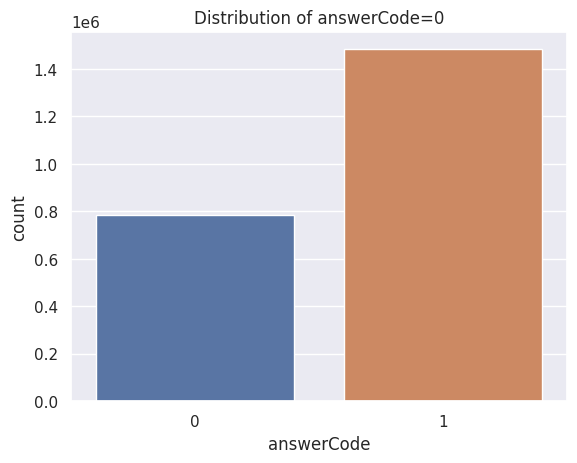

In [26]:
###########################
df.answerCode.value_counts()
sns.countplot(data=df, x='answerCode').set_title('Distribution of answerCode=0')


### 월별 평균, 총합, 개수

In [28]:
#####################################
last_1M = df.groupby([pd.Grouper(freq='1M',key='Timestamp')])["answerCode"].agg(["mean", "sum", "count"])
last_1M

,mean,sum,count
Timestamp,,,
2020-01-31 00:00:00+09:00,0.712327,26552,37275
2020-02-29 00:00:00+09:00,0.687252,54563,79393
2020-03-31 00:00:00+09:00,0.683585,118397,173200
2020-04-30 00:00:00+09:00,0.648943,115395,177820
2020-05-31 00:00:00+09:00,0.643199,118220,183800
2020-06-30 00:00:00+09:00,0.652214,148279,227347
2020-07-31 00:00:00+09:00,0.665786,180209,270671
2020-08-31 00:00:00+09:00,0.657330,207258,315303
2020-09-30 00:00:00+09:00,0.668912,227723,340438


### 월별로 뽑아낸 데이터의 개수와 정답률

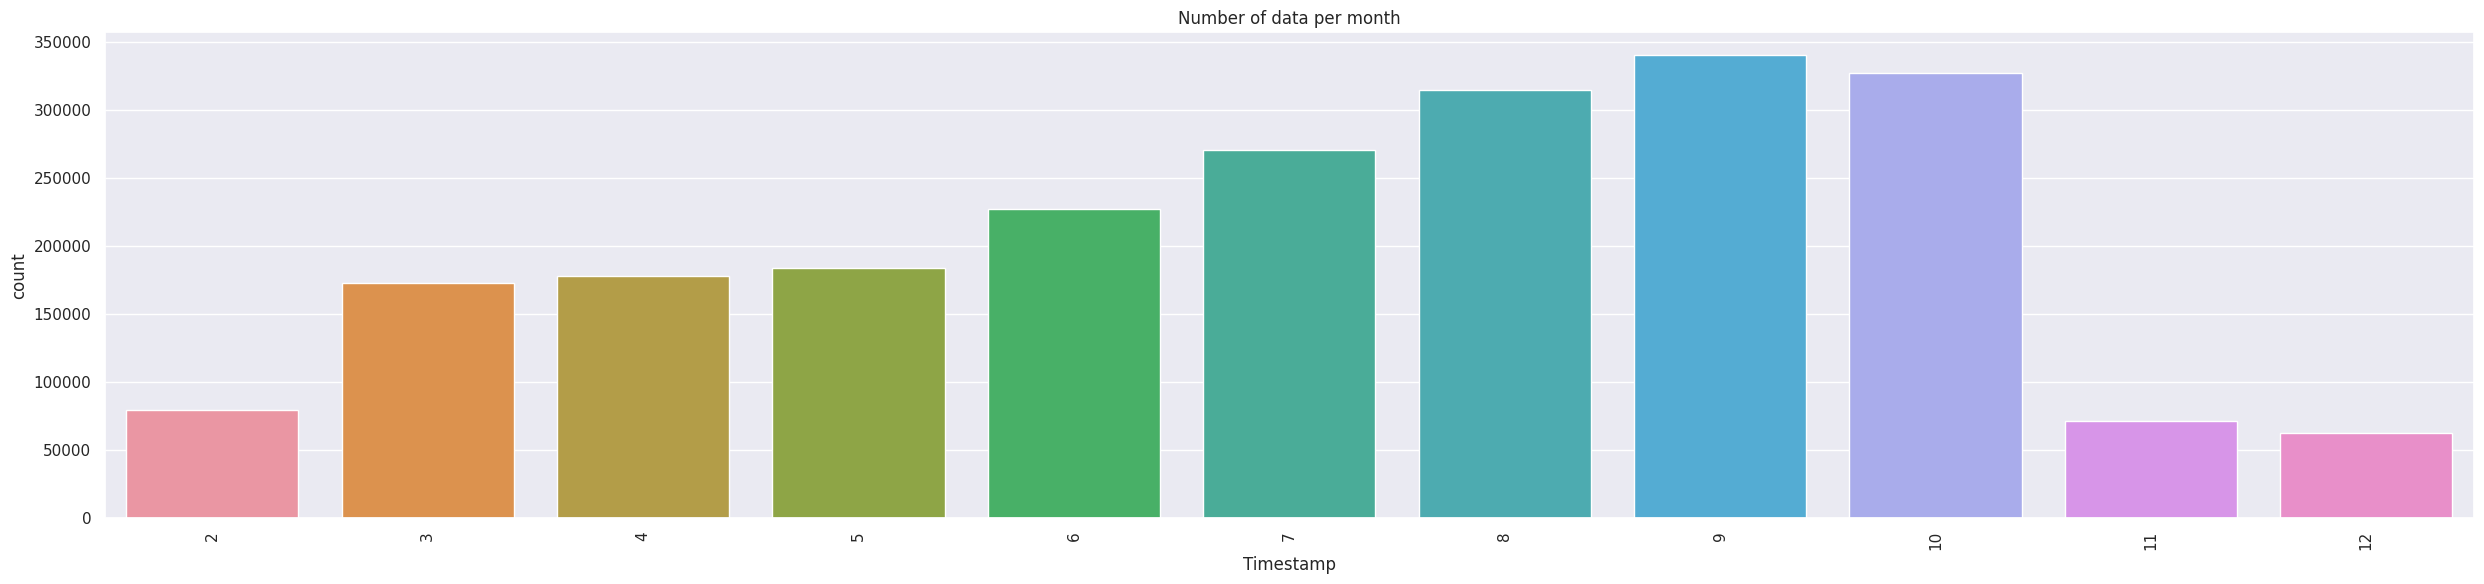

In [29]:
#####################################
plt.figure(figsize=(25,6))
sns.barplot(x=last_1M[1:].index.month , y=last_1M[1:]['count'])
plt.xticks(rotation=90)
plt.title('Number of data per month')
plt.tight_layout()

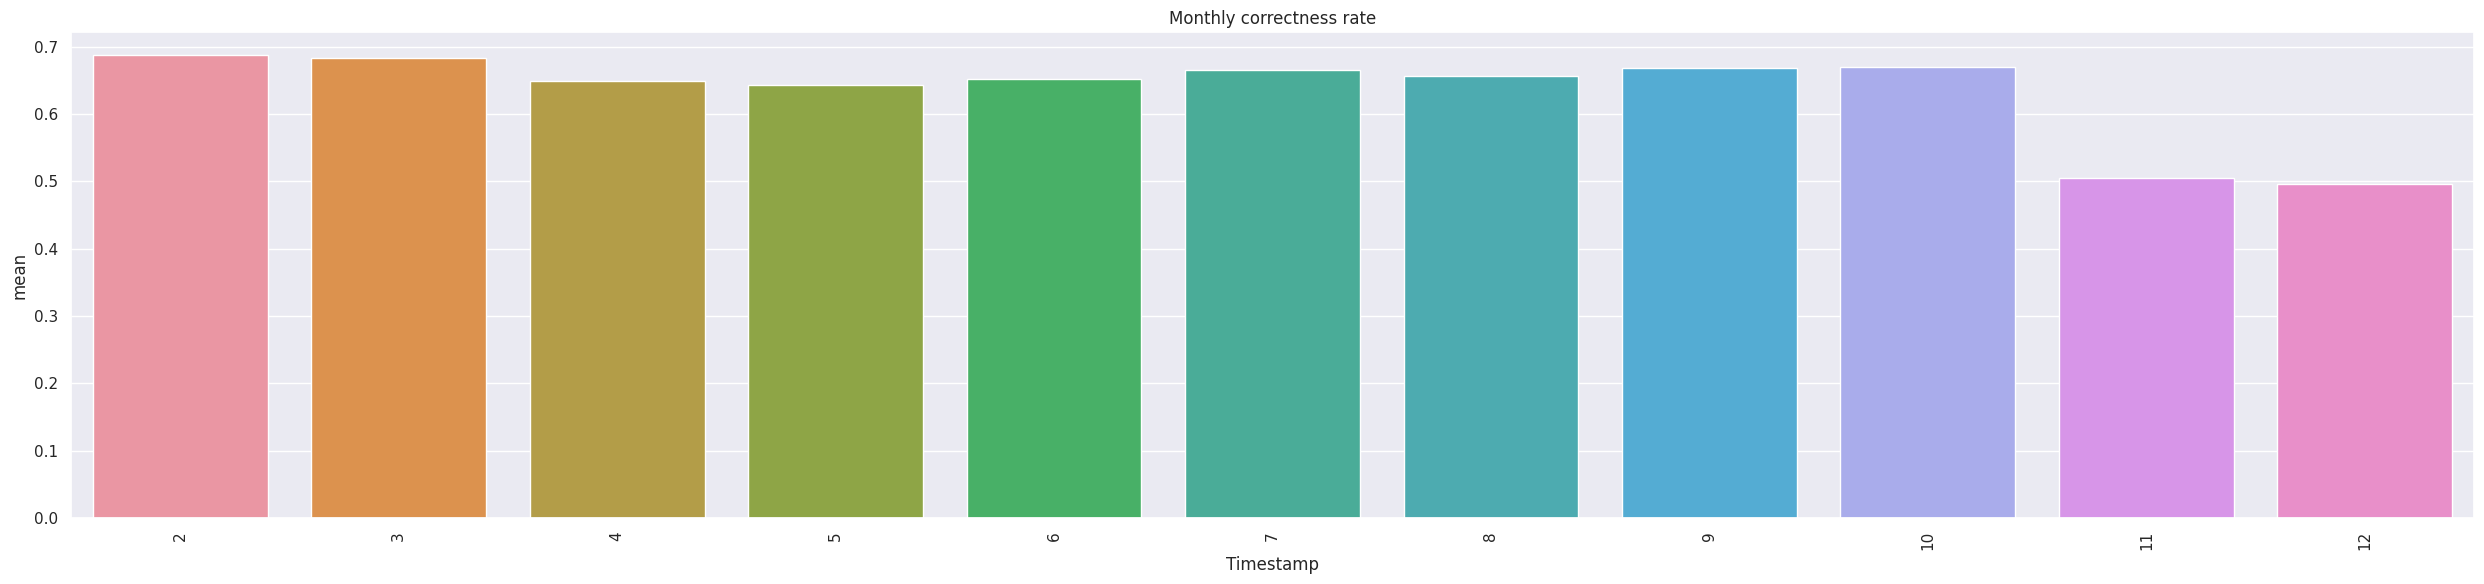

In [30]:
#####################################
plt.figure(figsize=(25,6))
sns.barplot(x=last_1M[1:].index.month, y=last_1M[1:]['mean'])
plt.xticks(rotation=90)
plt.title('Monthly correctness rate')
plt.tight_layout()

### 시간대별로 추출

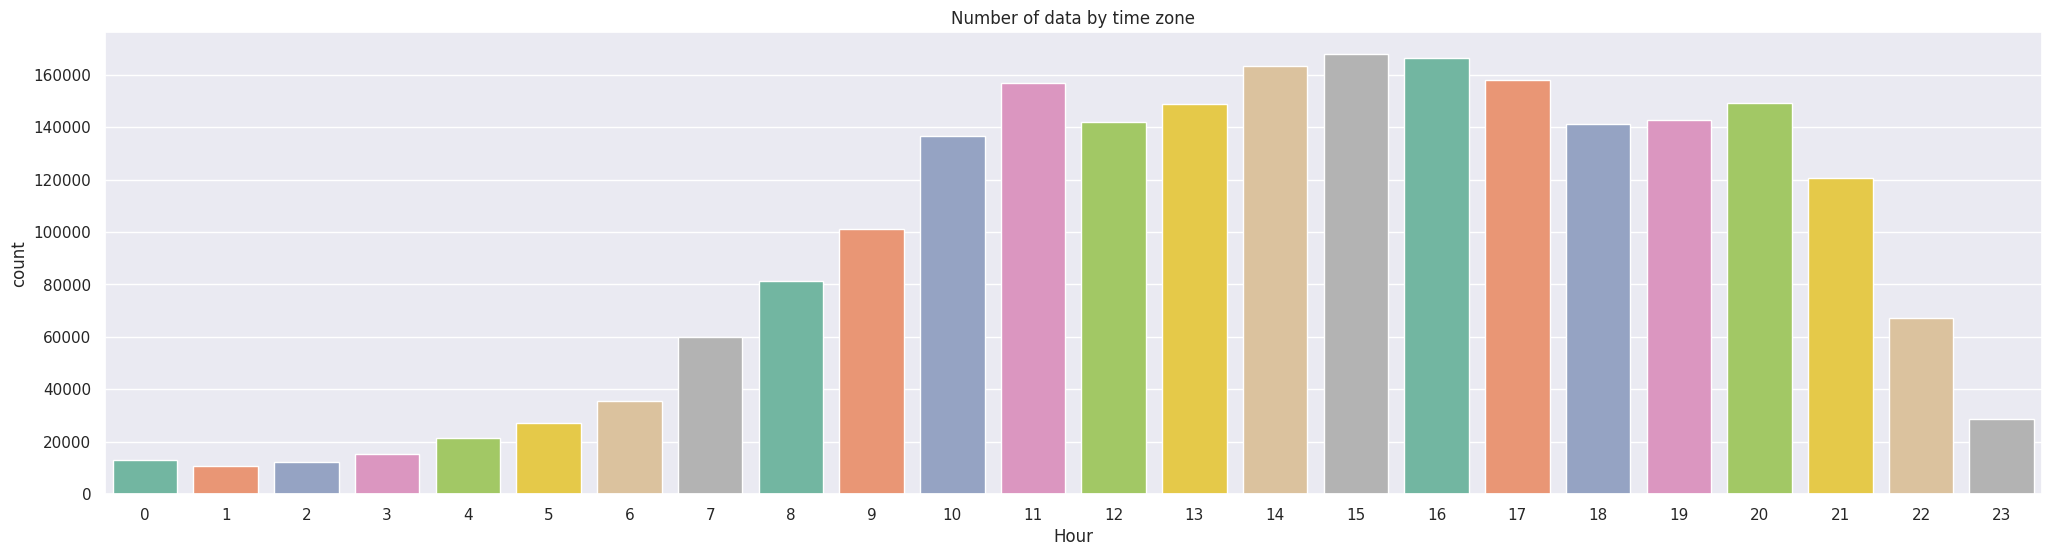

In [31]:
#####################################
df['Hour'] = df['Timestamp'].dt.hour 
Hour_ans_rate = df.groupby(["Hour"])["answerCode"].agg(["mean", "count"]).reset_index()

plt.figure(figsize=(25,6))
sns.barplot(x="Hour", y="count", data=Hour_ans_rate, palette='Set2')
plt.title('Number of data by time zone')
plt.show()

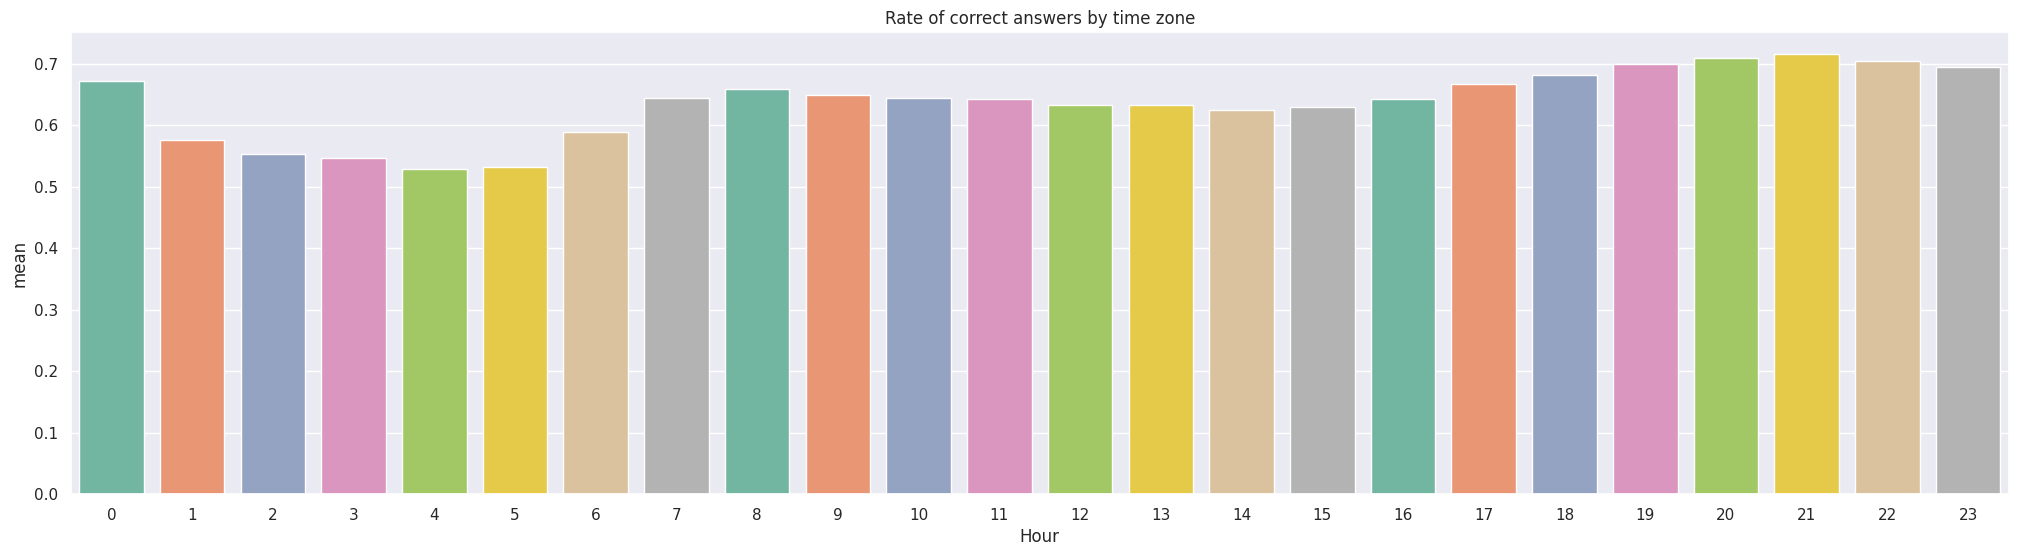

In [32]:
#####################################
plt.figure(figsize=(25,6))
sns.barplot(x="Hour", y="mean", data=Hour_ans_rate, palette='Set2')
plt.title('Rate of correct answers by time zone')
plt.show()

### 시간대별 정답률 확인

In [33]:
bins = [0, 6, 12, 18, 24]
labels = ['0~5', '6~11', '12~17', '18~23']
df['hour_range'] = pd.cut(df['Hour'], bins=bins, labels=labels, include_lowest=True)

Hour_range_ans_rate = df.groupby(["hour_range"])["answerCode"].agg(["mean", "count"]).reset_index()

## 새벽시간에 더 적은 문제를 풀었음에도 평균이 상대적으로 낮은것을 확인가능

In [34]:
Hour_range_ans_rate

,hour_range,mean,count
0,0~5,0.567104,135617
1,6~11,0.643983,677630
2,12~17,0.646124,945296
3,18~23,0.706901,508043


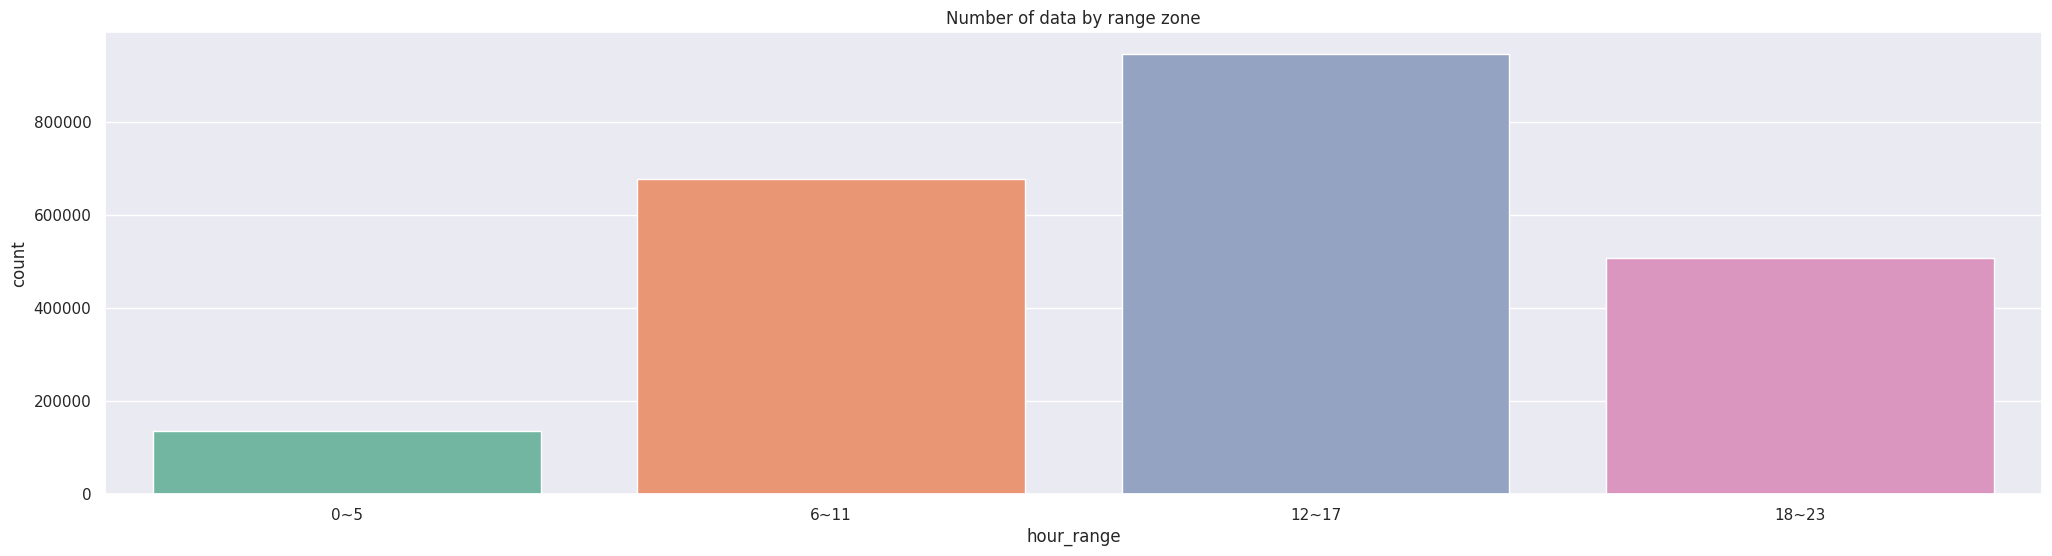

In [35]:
#####################################

plt.figure(figsize=(25,6))
sns.barplot(x="hour_range", y="count", data=Hour_range_ans_rate, palette='Set2')
plt.title('Number of data by range zone')
plt.show()

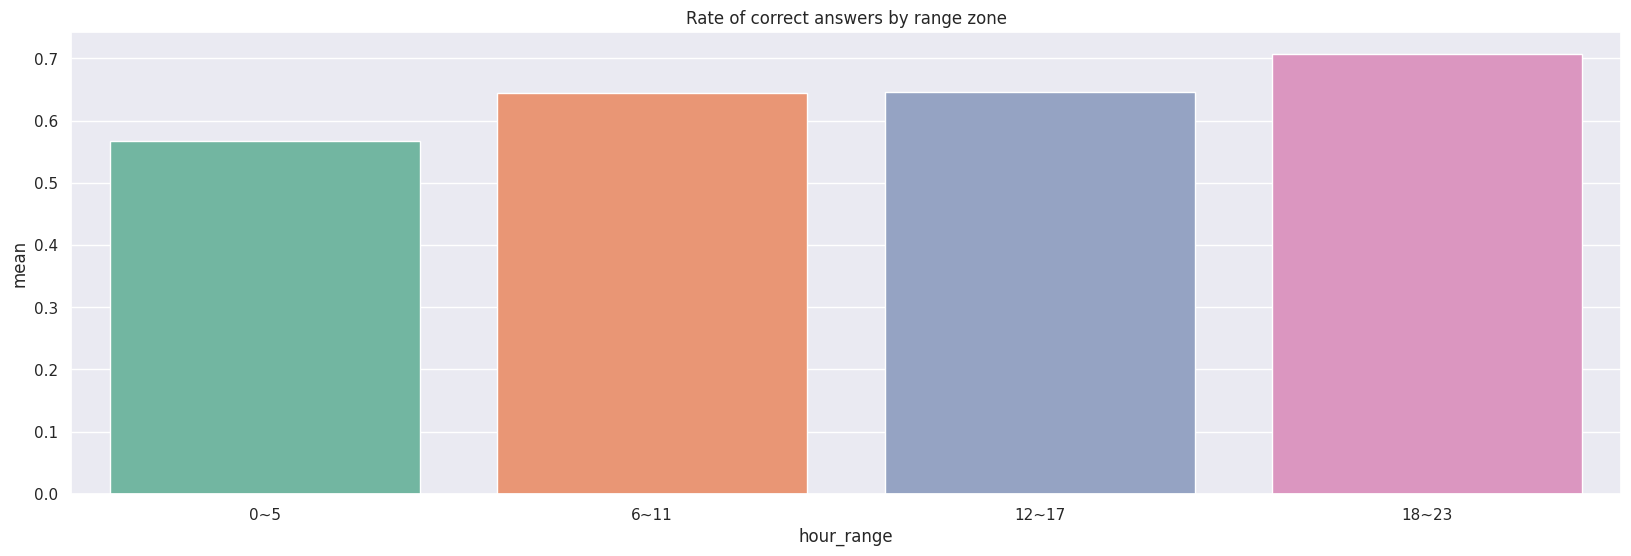

In [36]:
plt.figure(figsize=(20,6))
sns.barplot(x="hour_range", y="mean", data=Hour_range_ans_rate, palette='Set2')
plt.title('Rate of correct answers by range zone')
plt.show()

In [37]:
df['assessmentItemID'].apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

In [38]:
sum(
    df['assessmentItemID'].apply(lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:])
)

2266586

In [39]:
df['testId'].apply(lambda x: x[4:7]).unique()

array(['000'], dtype=object)

## 순서대로 안 푼 학생들이 좀 있는것 같아서 유의미한 데이터를 뽑을 수 있을지 확인

In [40]:
##########################
df_ = df.sort_values(by=['testId', 'Timestamp'])

df_["question_num"] = df_["assessmentItemID"].apply(lambda x: x[-3:])
df_.question_num.value_counts()



question_num
001    371755
003    371640
002    370972
004    369705
005    360607
006    197772
007    127121
008     67150
009     18417
010      5342
011      3352
012      2484
013       269
Name: count, dtype: int64

In [41]:
df__ = df.sort_values(by=['userID', 'testId','Timestamp'])
index = df.userID.unique()
df_assesment = pd.DataFrame(columns=['userID', 'testId', 'count'])
df__["assess_num"] = df_["assessmentItemID"].apply(lambda x: x[-3:])
df__['assess_num'] = df__['assess_num'].astype(int)

In [42]:
df__.dtypes

userID                                   int16
assessmentItemID                        object
testId                                  object
answerCode                                int8
Timestamp           datetime64[ns, Asia/Seoul]
KnowledgeTag                             int16
Hour                                     int32
hour_range                            category
assess_num                               int64
dtype: object

In [43]:
index

array([   0,    1,    2, ..., 7438, 7440, 7441], dtype=int16)

In [44]:
df__

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,Hour,hour_range,assess_num
584,0,A020172001,A020000172,1,2020-10-11 20:06:47+09:00,8132,20,18~23,1
585,0,A020172002,A020000172,1,2020-10-11 20:06:56+09:00,8132,20,18~23,2
586,0,A020172003,A020000172,1,2020-10-11 20:07:13+09:00,8132,20,18~23,3
587,0,A020172004,A020000172,1,2020-10-11 20:07:46+09:00,8132,20,18~23,4
588,0,A020172005,A020000172,0,2020-10-11 20:08:20+09:00,8132,20,18~23,5
...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 15:50:21+09:00,438,15,12~17,5
2266582,7441,A040165001,A040000165,1,2020-08-21 10:06:39+09:00,8836,10,6~11,1
2266583,7441,A040165002,A040000165,1,2020-08-21 10:06:50+09:00,8836,10,6~11,2
2266584,7441,A040165003,A040000165,1,2020-08-21 10:07:36+09:00,8836,10,6~11,3


In [45]:
df__ = df.sort_values(by=['userID', 'testId','Timestamp'])
index = df.userID.unique()
df_assesment = pd.DataFrame(columns=['userID', 'testId', 'count'])
df__["assess_num"] = df_["assessmentItemID"].apply(lambda x: x[-3:])
df__['assess_num'] = df__['assess_num'].astype(int)


for j in index:
    df_1 = df__[df__['userID'] == j]
    index_test = df_1.testId.unique()
    for i in index_test:
        # df_2 = df_1[df_1.duplicated(['assess_num', 'Timestamp'], keep=False) == True]
        df_2 = df_1[df_1['testId'] == i]
        count = 0
        assess = []
        
        for k in df_2['Timestamp']:
            assess.append(df_2[df_2['Timestamp'] == k].assess_num.values[0])
        

        for idx in range(1,len(assess)):
            if assess[idx] < assess[idx-1]:
                count+=1
                
        if(count == 0):
            continue
        else:
            df_assesment.loc[len(df_assesment)] = [j, i, count]
            
    

In [57]:
df_assesment['userID'].max()

7440

In [58]:
df_assesment

,userID,testId,count
0,0,A080000004,1
1,0,A080000008,1
2,0,A080000012,1
3,0,A080000014,1
4,0,A080000016,1
...,...,...,...
38833,7425,A060000177,1
38834,7428,A080000124,1
38835,7434,A010000068,1
38836,7436,A030000019,3


In [47]:
reverse_index = df_assesment.userID.unique()

In [48]:
reverse_index.size

5020

In [49]:
assess_groupby = df_assesment.groupby('userID').agg({
    'testId': 'count',
})
assess_groupby

,testId
userID,
0,15
1,25
2,4
5,19
6,8
...,...
7425,1
7428,1
7434,1


In [50]:
def percentile(s):
    return np.sum(s) / len(s)

In [51]:
reverse_index = df_assesment.userID.unique()
df_reverse = df[df.userID.isin(reverse_index)].groupby('userID').agg({
    'answerCode': percentile
})
df_reverse

,answerCode
userID,
0,0.630872
1,0.853162
2,0.612319
5,0.795918
6,0.442997
...,...
7425,0.722222
7428,0.823529
7434,0.400000


In [52]:
df_reverse

,answerCode
userID,
0,0.630872
1,0.853162
2,0.612319
5,0.795918
6,0.442997
...,...
7425,0.722222
7428,0.823529
7434,0.400000


In [53]:
df_reverse.describe()

,answerCode
count,5020.000000
mean,0.627939
std,0.157171
min,0.083333
25%,0.526953
50%,0.649328
75%,0.750000
max,0.957746


### 순서대로 안푼 사람 5020명, 순서대로 푼 사람 1678명
### 정답률 1%로 근소한차이 -> 유의미한 결과는 뽑아내지 못한것 같다.

In [54]:
df_without_reverse = df[~df.userID.isin(reverse_index)].groupby('userID').agg({
    'answerCode': percentile
})
df_without_reverse

,answerCode
userID,
126,0.750936
329,0.825397
331,0.753176
421,0.694796
441,0.846154
...,...
7433,0.533333
7435,0.533333
7437,0.375000


In [55]:
df_without_reverse.describe()

,answerCode
count,1678.000000
mean,0.631812
std,0.166821
min,0.000000
25%,0.528340
50%,0.659648
75%,0.758621
max,1.000000
